In [35]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib

%matplotlib inline

matplotlib.style.use('ggplot')
matplotlib.rcParams.update({'font.size': 22})
matplotlib.rcParams.update({'figure.autolayout': True})

In [2]:
import os
os.system("bedtools multicov -bams 59440_S1.bam -bed exons.bed > 59440_conteo.txt")

0

In [4]:
import os
os.system("bedtools coverage -a exons.bed -b 59440_S1.bam -d -split > exon_59440.txt")

0

In [2]:
df = pd.read_table('exon_59440.txt', names = ["chr", "Start", "End", "Exon", "Pos_exon","Cov"])


In [3]:
df2 = pd.read_table('59440_conteo.txt', names = ["chr", "Start", "End", "Exon","Cov"])


In [4]:
df2.head()

,chr,Start,End,Exon,Cov
0,chr1,35138,35174,FAM138A_3,2
1,chr1,35277,35481,FAM138A_2,1
2,chr1,35721,35736,FAM138A_1,0
3,chr1,53049,53067,AL627309.2_1,0
4,chr1,54830,54936,AL627309.2_2,0


In [5]:
df1 = pd.read_csv('Genes_IGV')

In [6]:
df1.head()

,Genes IGV
0,GCK
1,HNF1A
2,HNF1B
3,HNF4A
4,PDX1


In [7]:
genes = df1['Genes IGV'].tolist()

In [8]:
todos = df[df['Exon'].str.contains('|'.join(genes))]

In [10]:
todos

,chr,Start,End,Exon,Pos_exon,Cov
8141675,chr12,121416572,121416897,HNF1A_1,1,93
8141676,chr12,121416572,121416897,HNF1A_1,2,93
8141677,chr12,121416572,121416897,HNF1A_1,3,97
8141678,chr12,121416572,121416897,HNF1A_1,4,101
8141679,chr12,121416572,121416897,HNF1A_1,5,101
8141680,chr12,121416572,121416897,HNF1A_1,6,101
8141681,chr12,121416572,121416897,HNF1A_1,7,101
8141682,chr12,121416572,121416897,HNF1A_1,8,101
8141683,chr12,121416572,121416897,HNF1A_1,9,101
8141684,chr12,121416572,121416897,HNF1A_1,10,103


In [11]:
todos1 = todos[todos['Exon'].str.contains("GCKR_") == False]

,chr,Start,End,Exon,Pos_exon,Cov
8141675,chr12,121416572,121416897,HNF1A_1,1,93
8141676,chr12,121416572,121416897,HNF1A_1,2,93
8141677,chr12,121416572,121416897,HNF1A_1,3,97
8141678,chr12,121416572,121416897,HNF1A_1,4,101
8141679,chr12,121416572,121416897,HNF1A_1,5,101


In [82]:
df_atm = df[df['Exon'].str.contains('^GCK_')]

In [43]:
df_atm1 = df[df['Exon'].str.contains('GCK_9')]

In [31]:
df_atm1

,chr,Start,End,Exon,Pos_exon,Cov
8453962,chr13,28494276,28494681,PDX1_1,1,6
8453963,chr13,28494276,28494681,PDX1_1,2,6
8453964,chr13,28494276,28494681,PDX1_1,3,6
8453965,chr13,28494276,28494681,PDX1_1,4,6
8453966,chr13,28494276,28494681,PDX1_1,5,6
8453967,chr13,28494276,28494681,PDX1_1,6,6
8453968,chr13,28494276,28494681,PDX1_1,7,6
8453969,chr13,28494276,28494681,PDX1_1,8,6
8453970,chr13,28494276,28494681,PDX1_1,9,8
8453971,chr13,28494276,28494681,PDX1_1,10,8


In [23]:
df_atm

,chr,Start,End,Exon,Pos_exon,Cov
28290106,chr7,44184735,44184879,GCK_10,1,17
28290107,chr7,44184735,44184879,GCK_10,2,17
28290108,chr7,44184735,44184879,GCK_10,3,17
28290109,chr7,44184735,44184879,GCK_10,4,17
28290110,chr7,44184735,44184879,GCK_10,5,19
28290111,chr7,44184735,44184879,GCK_10,6,20
28290112,chr7,44184735,44184879,GCK_10,7,20
28290113,chr7,44184735,44184879,GCK_10,8,20
28290114,chr7,44184735,44184879,GCK_10,9,20
28290115,chr7,44184735,44184879,GCK_10,10,20


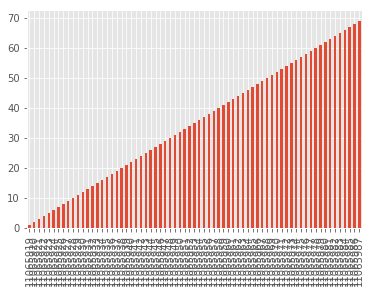

In [78]:
df_atm["Pos_exon"].plot(kind="bar")

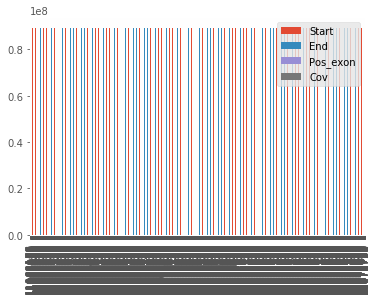

In [131]:
plt.figure(figsize=(20,10))
df_atm.plot(kind="bar")
plt.show()

In [14]:
df_atm3 = todos1[['Cov','Exon']].groupby('Exon').mean()

In [77]:
df_atm4 = df_atm3.sort_values('Cov', ascending= True)

In [ ]:
df_atm3.plot(kind='bar')

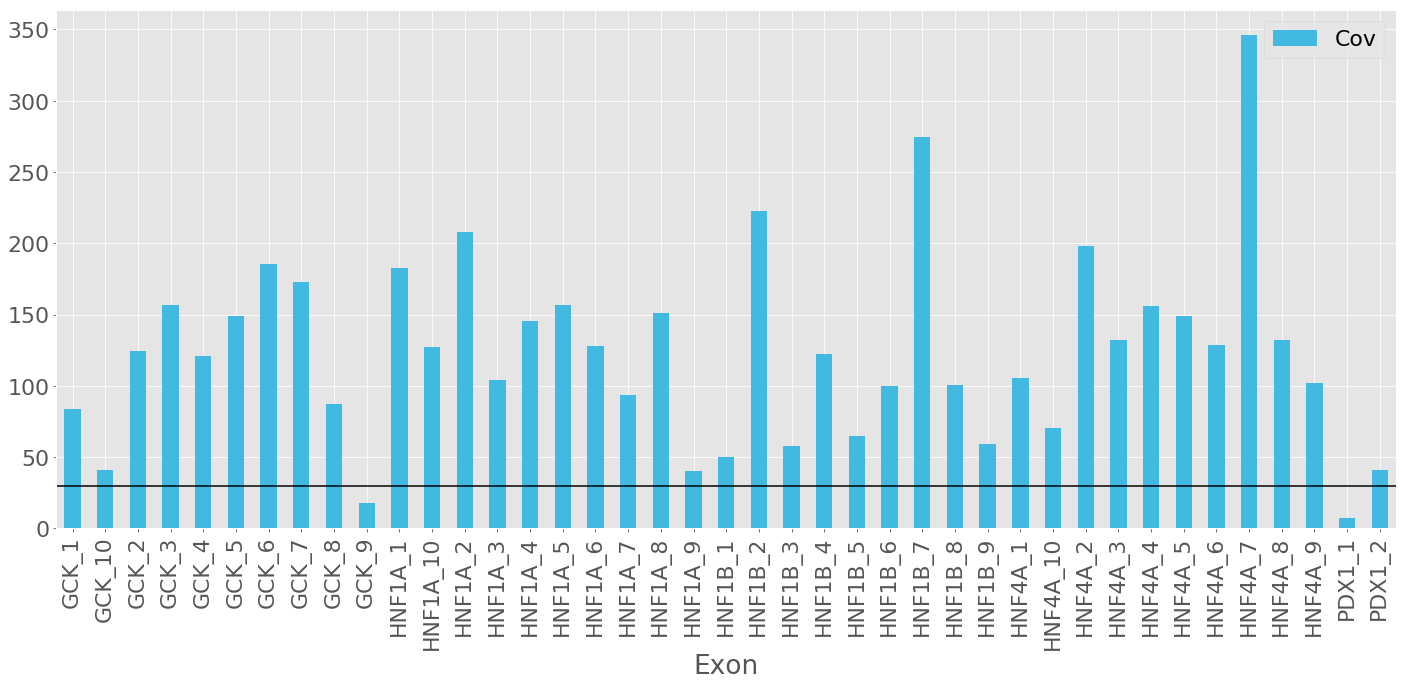

In [37]:
plot = df_atm3.plot(kind="bar",figsize=(20, 10), color = [('#41b9e1')]);plt.axhline(30, color='k')
fig = plot.get_figure()
fig.savefig("output.png", bbox_inches=0)


In [39]:
df_atm1 = df[df['Exon'].str.contains('HNF1A_9')]

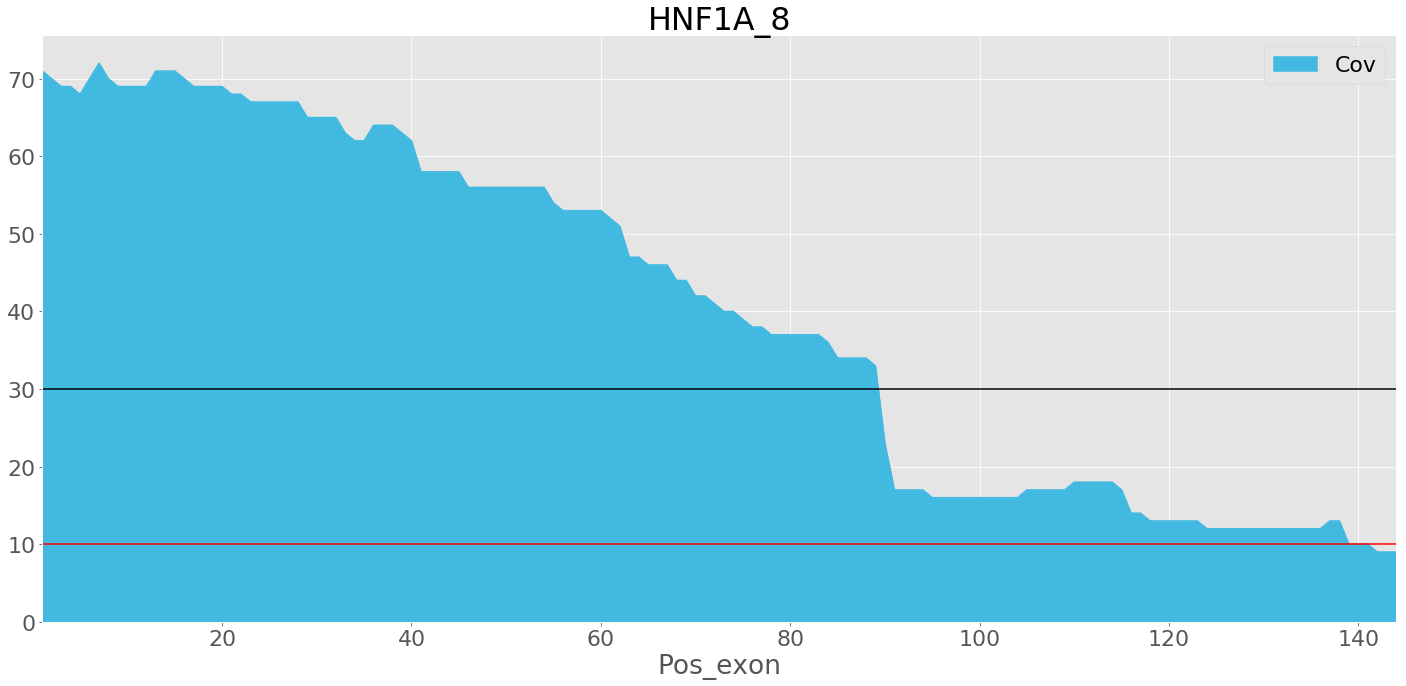

In [40]:
plt.figure(figsize=(20,10))
df_atm1.plot(kind='area', x='Pos_exon', y='Cov',figsize=(20, 10),title = 'HNF1A_8',color = [('#41b9e1')]);plt.axhline(10, color='r');plt.axhline(30, color='k')
plt.savefig('image2.png')

In [51]:
GCK_9 = df[df['Exon'].str.contains('GCK_9')]

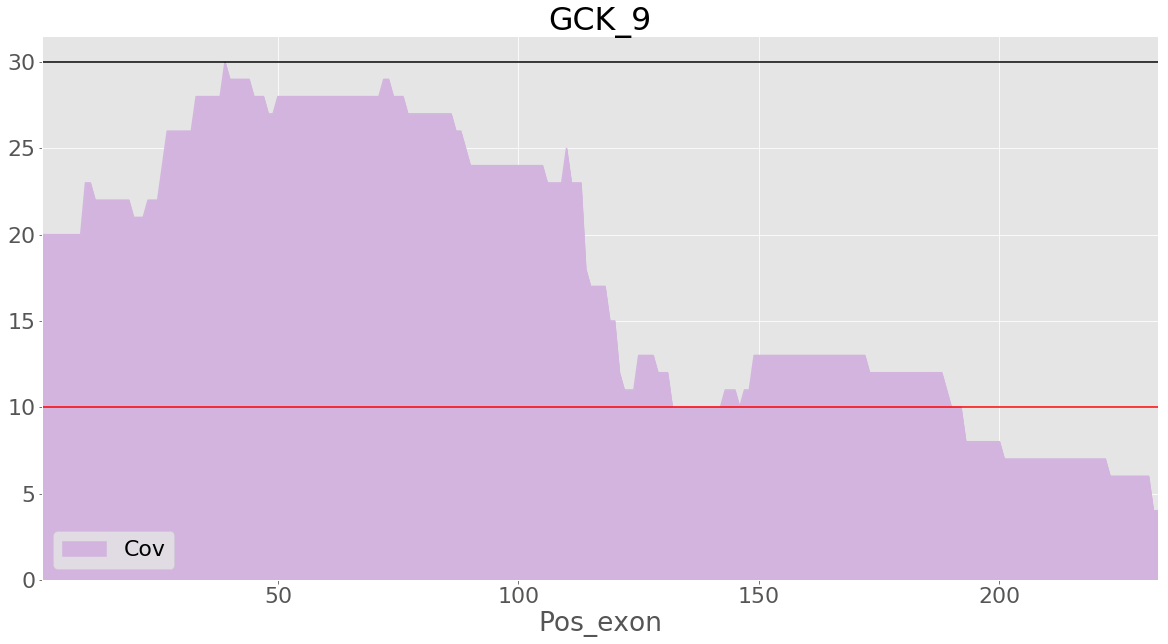

In [71]:
plt.figure(figsize=(20,10))
GCK_9.plot(kind='area', x='Pos_exon', y='Cov',figsize=(20, 10),title = 'GCK_9',color = [('#d2b4de')]);plt.axhline(10, color='r');plt.axhline(30, color='k')
plt.savefig('image2.png')

In [63]:
PDX1_1 = df[df['Exon'].str.contains('PDX1_1')]

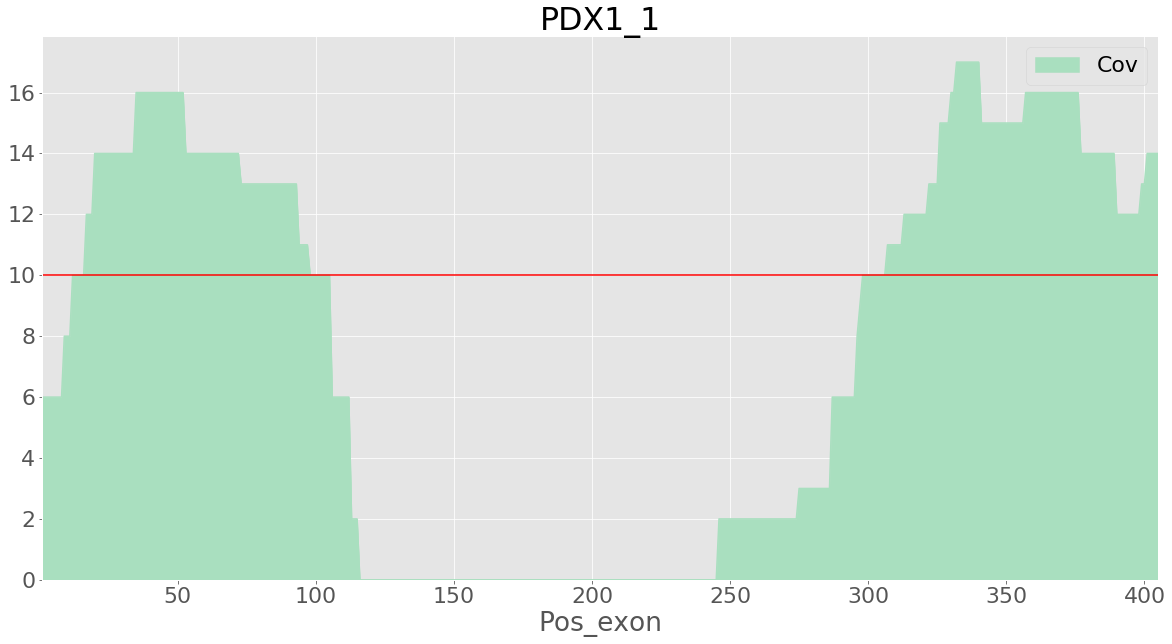

In [73]:
plt.figure(figsize=(20,10))
PDX1_1.plot(kind='area', x='Pos_exon', y='Cov',figsize=(20, 10),title = 'PDX1_1',color = [('#a9dfbf')]);plt.axhline(10, color='r');plt.axhline(30, color='k')
plt.savefig('image2.png')

In [42]:
PDX1_2 = df[df['Exon'].str.contains('PDX1_2')]

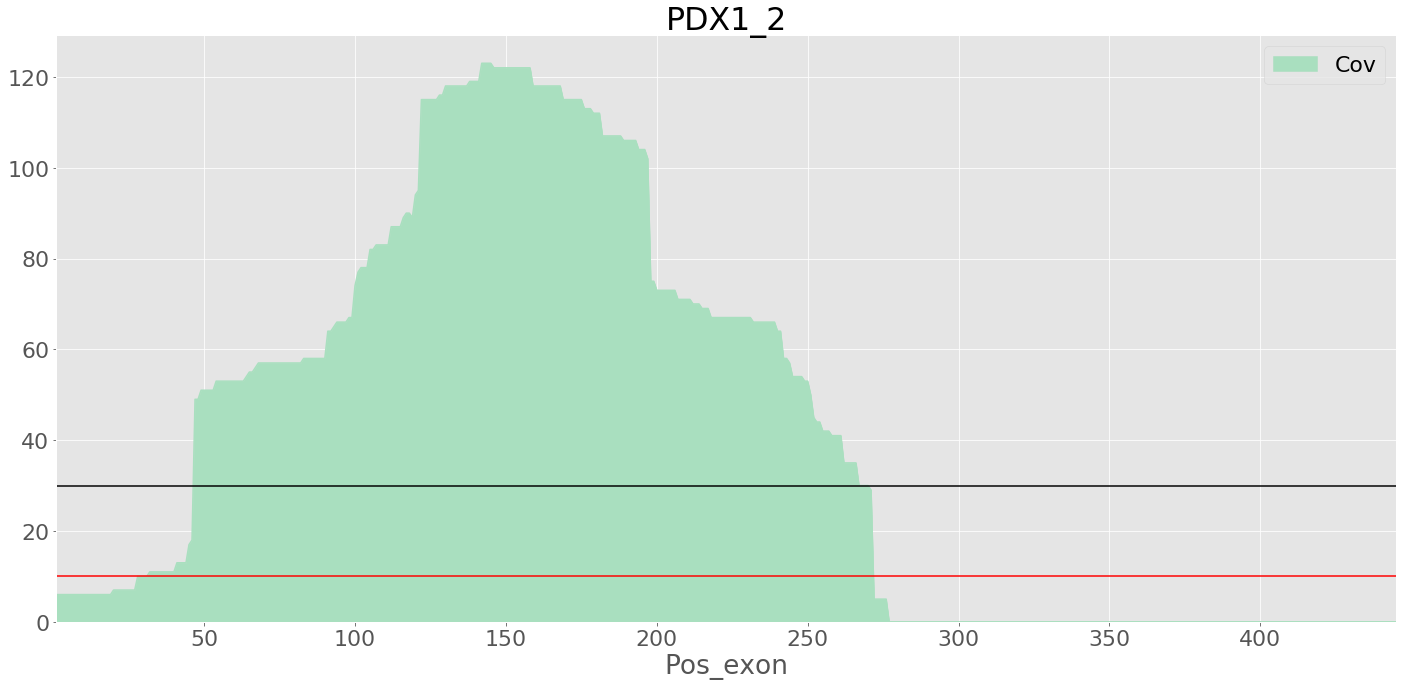

In [44]:
plt.figure(figsize=(20,10))
PDX1_2.plot(kind='area', x='Pos_exon', y='Cov',figsize=(20, 10),title = 'PDX1_2',color = [('#a9dfbf')]);plt.axhline(10, color='r');plt.axhline(30, color='k')
plt.savefig('image2.png')

In [45]:
ATM = df[df['Exon'].str.contains('^ATM_')]

In [47]:
ATM1 = ATM[['Cov','Exon']].groupby('Exon').mean()

In [58]:
ATM3

,chr,Start,End,Exon,Pos_exon,Cov
6258176,chr11,108098352,108098423,ATM_2,1,45
6258177,chr11,108098352,108098423,ATM_2,2,45
6258178,chr11,108098352,108098423,ATM_2,3,45
6258179,chr11,108098352,108098423,ATM_2,4,51
6258180,chr11,108098352,108098423,ATM_2,5,51
6258181,chr11,108098352,108098423,ATM_2,6,51
6258182,chr11,108098352,108098423,ATM_2,7,51
6258183,chr11,108098352,108098423,ATM_2,8,51
6258184,chr11,108098352,108098423,ATM_2,9,51
6258185,chr11,108098352,108098423,ATM_2,10,51


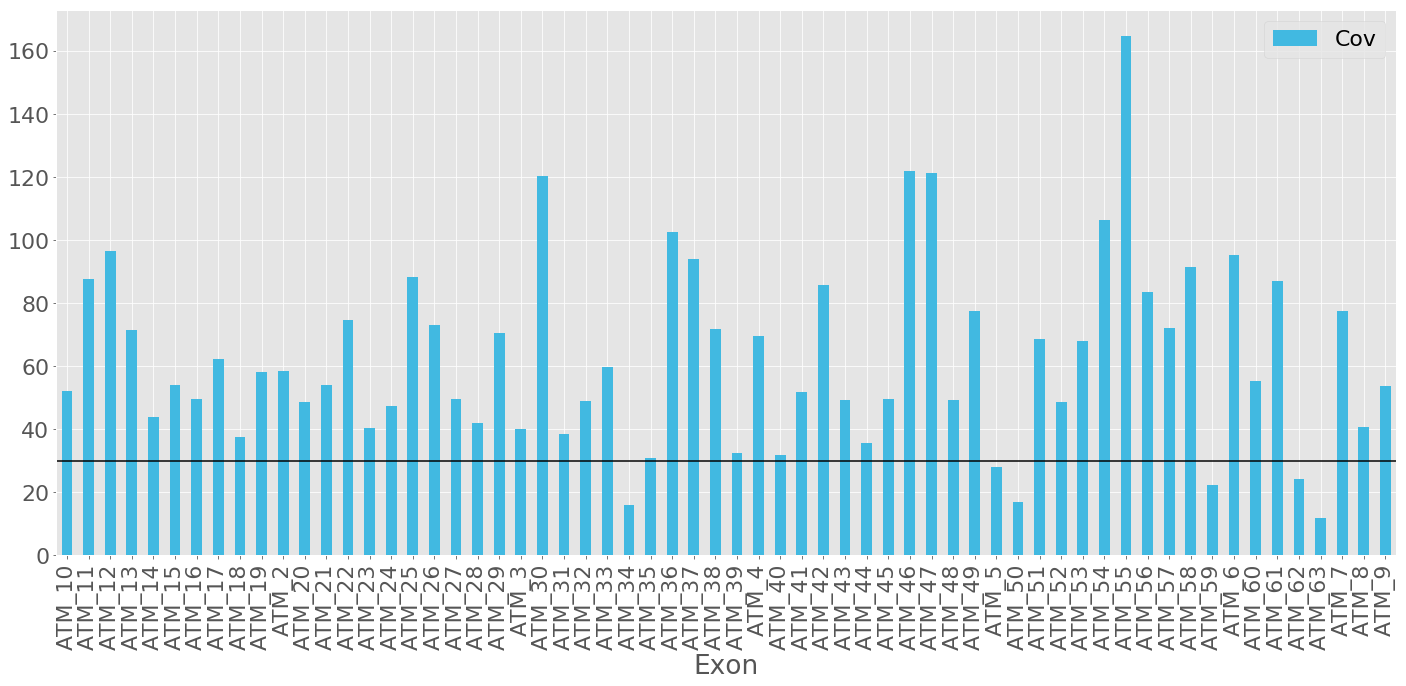

In [49]:
plot = ATM1.plot(kind="bar",figsize=(20, 10), color = [('#41b9e1')]);plt.axhline(30, color='k')
fig = plot.get_figure()
fig.savefig("output.png", bbox_inches=0)


In [67]:
atm = ATM1.sort_values('Cov', ascending= True)

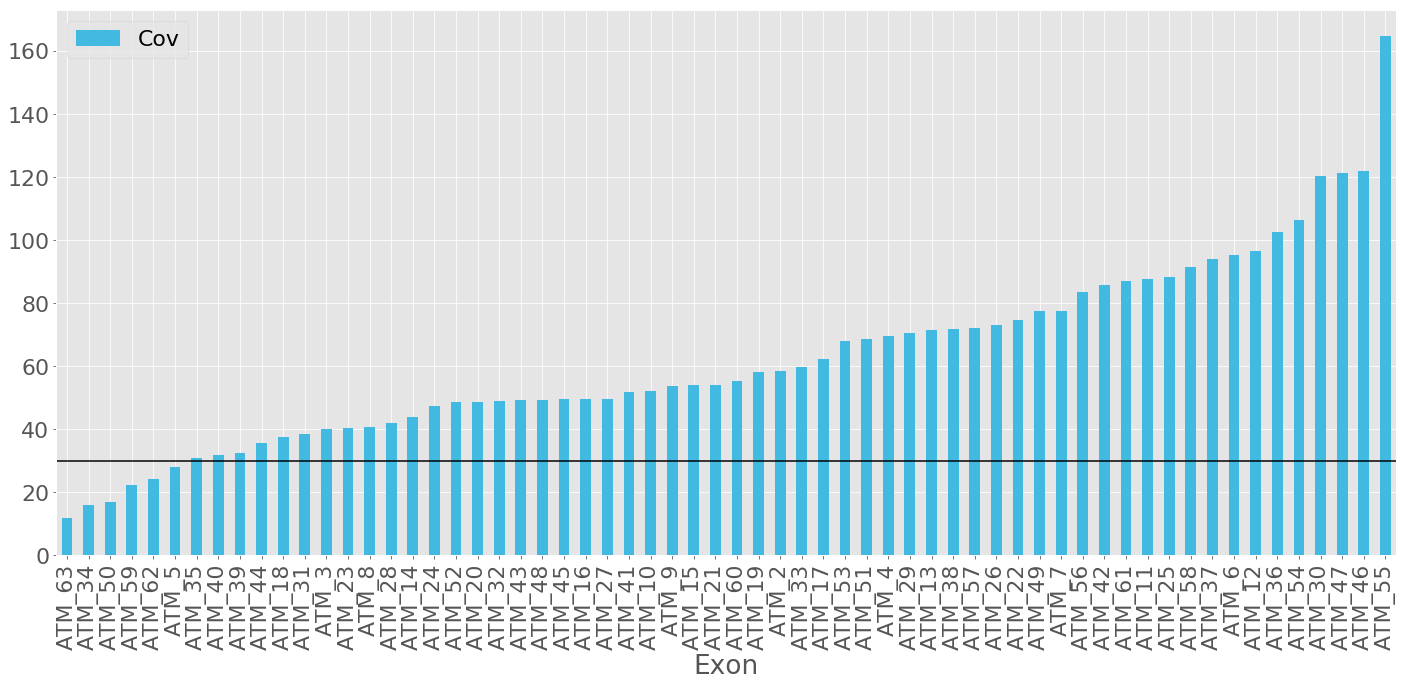

In [68]:
plot = atm.plot(kind="bar",figsize=(20, 10), color = [('#41b9e1')]);plt.axhline(30, color='k')
fig = plot.get_figure()
fig.savefig("output.png", bbox_inches=0)


In [65]:
ATM34 = df[df['Exon'].str.contains('^ATM_34')]

In [70]:
ATM63 = df[df['Exon'].str.contains('^ATM_63')]

In [72]:
ATM55 = df[df['Exon'].str.contains('^ATM_55')]

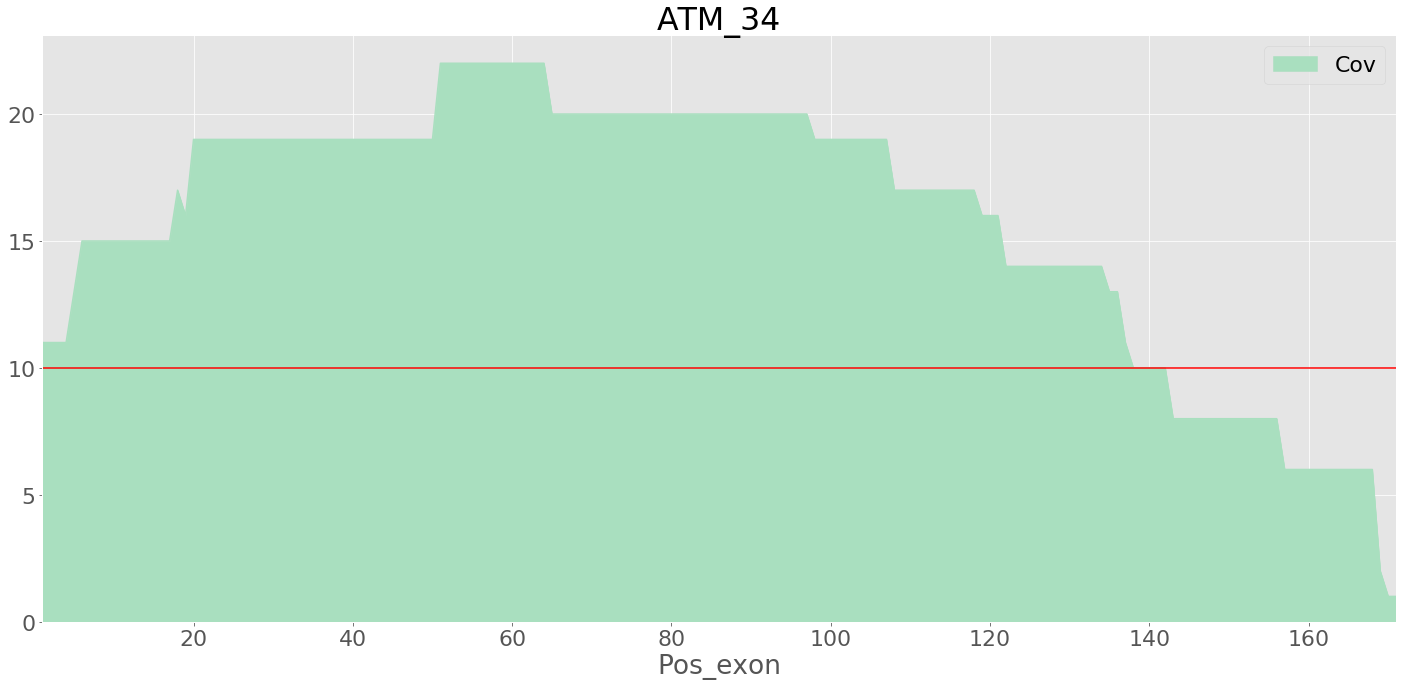

In [66]:
plt.figure(figsize=(20,10))
ATM34.plot(kind='area', x='Pos_exon', y='Cov',figsize=(20, 10),title = 'ATM_34',color = [('#a9dfbf')]);plt.axhline(10, color='r');plt.axhline(30, color='k')
plt.savefig('image2.png')

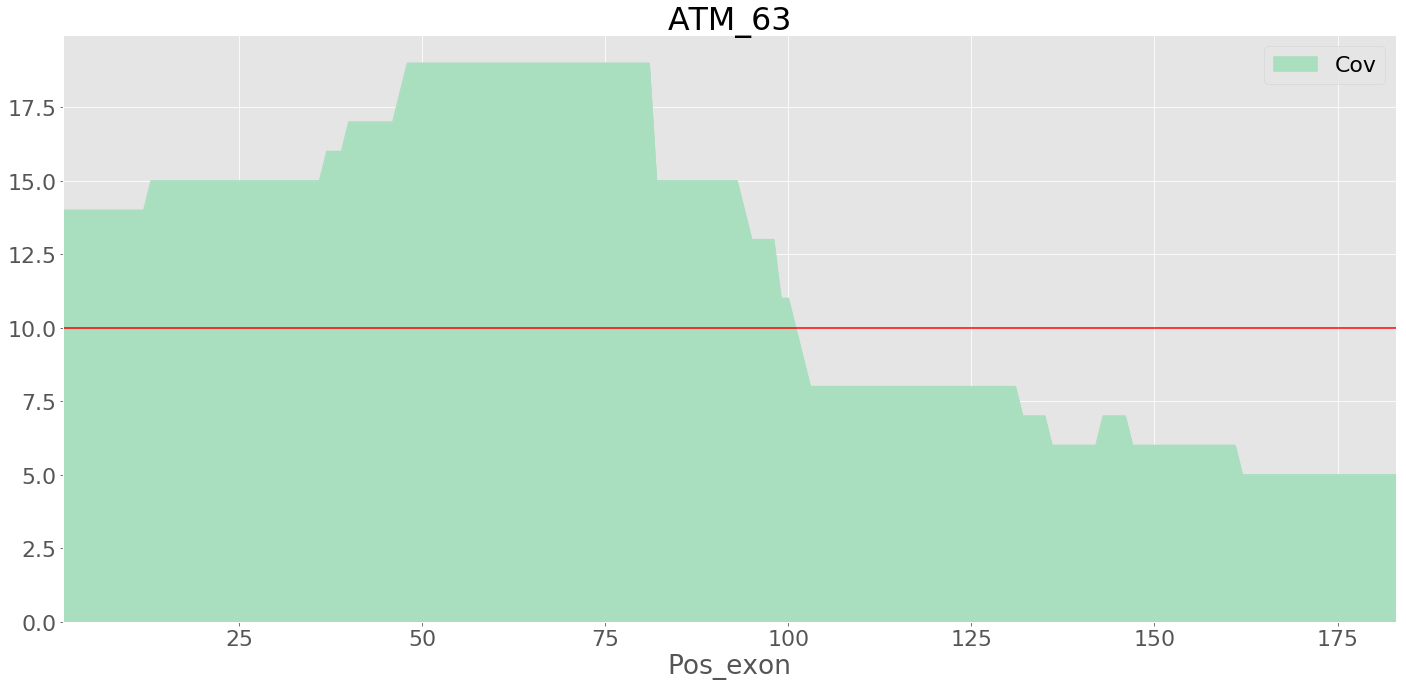

In [71]:
plt.figure(figsize=(20,10))
ATM63.plot(kind='area', x='Pos_exon', y='Cov',figsize=(20, 10),title = 'ATM_63',color = [('#a9dfbf')]);plt.axhline(10, color='r');plt.axhline(30, color='k')
plt.savefig('image2.png')

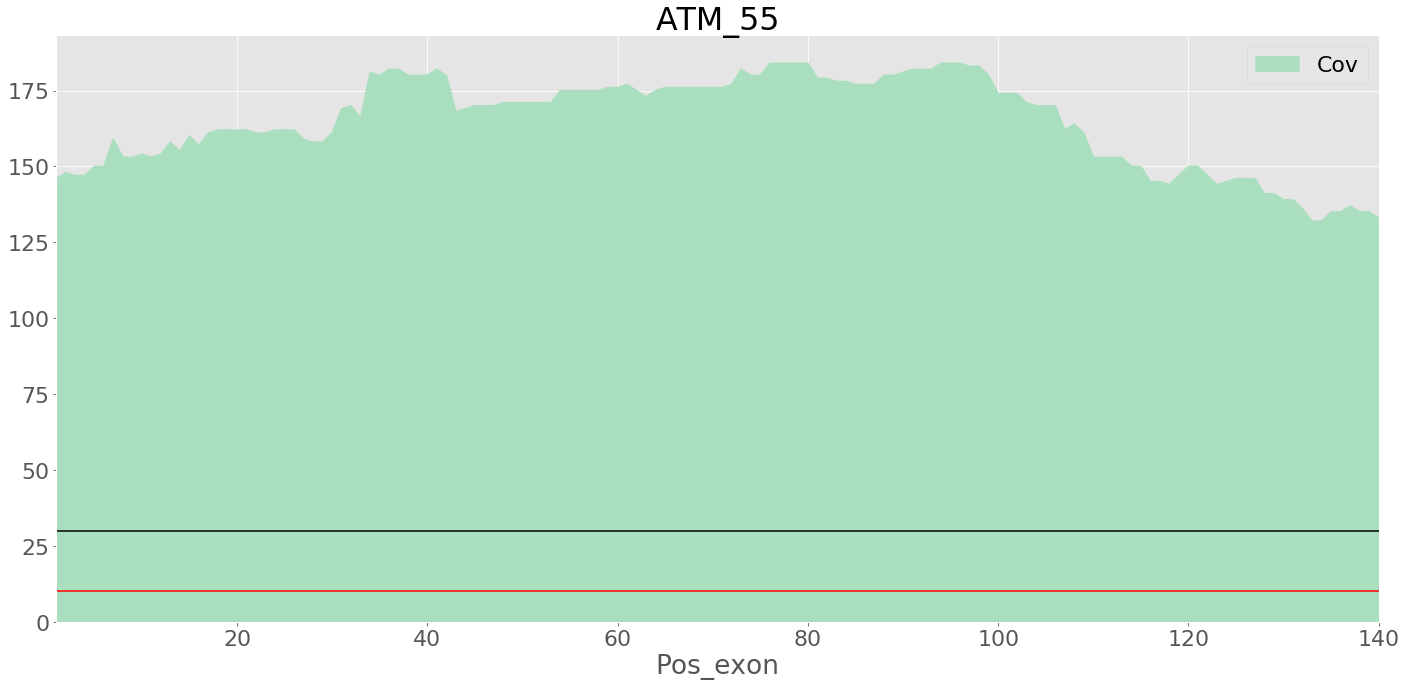

In [73]:
plt.figure(figsize=(20,10))
ATM55.plot(kind='area', x='Pos_exon', y='Cov',figsize=(20, 10),title = 'ATM_55',color = [('#a9dfbf')]);plt.axhline(10, color='r');plt.axhline(30, color='k')
plt.savefig('image2.png')